## Final Project phase 1

plese fill out
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Student name:  JULIET WANJA THUKU

 Student pace:  part time

 Instructor name:MARYANNE MWIKALI


 # INTRODUCTION

There are so many  succesful video content creator companies, and the rise of this companies, has raised standards to the quality of 
movie content being produced. we will generate insight for our business  stakeholder, Microsoft , who wants to get into the fun of also creating original video content like all the other big companies.we will look into data from the best performing company.BOX OFFICE, to explore what approach to take so that an informed decision on what type of films to create can be made.

## BUSINESS UNDERSTANDING
For us to comprehend what microsoft's new studio needs, to have a start atleast, we'll have to ask ourselves the non- hypothetical questions that might  have led to box office being successful. With this microsoft can have answers and borrowed ideas from box office
so from the  data provided in Box office we should be able to tell :

* what genre of movie has led to its success
* the impact of release date to studio's success
*  what is the audience reception to movie being produced
* what is the target audience that has made it succesful
and many other answers that we will get from the data provided

# ANALYSIS
As mentioned earlier growth has been rapid globally.The top most succesful company , Box office has been producing very captivating films and films very workable commercially.Microsoft is holding so much portential to place itself in a player role in the entertainment sector.for our analysis we'll will be extracting data from the datasets that we have available, which will answer the different questions above to give us a detailed analysis of a portential succesful start for our new studio.




# DATA UNDERSTANDING
we will be pulling data from 'MY DATA' folder that contains files provided by Box Office, for this analysis.files contained in this folder are as follows:

* bom.movie_gross.csv
* name.basics.csv
* rt.movie_info.tsv
* rt.reviews.tsv
* title.akas.csv
* title.basics.csv
* title.crew.csv
* title.principals.csv
* title.ratings.csv
* tmdb.movies.csv
* tn.movie_budgets.cs

we are going to see what we are working with in each data files that we have in 'MyData' folder.after which we will answer different questions that we might be having

in the cell below will load all liblaries that we will use with their alias
and read  data that is contained in the csv files that we have 

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# bom.movie_gross.csv

In [2]:
#opening our file that contains the performaance of movies
movie_performance = pd.read_csv('mydata/bom.movie_gross.csv')
movie_performance

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The dataset above contains information about movies, including their titles, studios, domestic gross earnings, foreign gross earnings, and the release year

In [3]:
type(movie_performance)

pandas.core.frame.DataFrame

In [4]:
#description of the dataframe
movie_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#size of the movie_performance dataframe
movie_performance.shape
#  it has 3387 rows and five columns

(3387, 5)

In [6]:
movie_performance.columns
# this will execute the names of columns that we have in our dataframe

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
#we'll identify the missing values form our dataset
missing_movie_performance = movie_performance.isnull()

# Count the number of missing values in each column
missing_count = missing_movie_performance.sum()

# Print the columns with missing values
print(missing_count[missing_count > 0])

studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


foreign_gross column has quiet alot of missing values .for the studio and domestic _gross column is workable we could drop the null rows.

In [8]:

duplicates = movie_performance.duplicated()

# To see the rows that are duplicates
print(movie_performance[duplicates])

# To count the total number of duplicates
print("Total duplicates:", duplicates.sum())


Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []
Total duplicates: 0


so basing of the fact that we have missing values we would definately work with what we have.Therefore in the cell below we are going to drop off all missing values in the columns.

In [9]:
dropped_ = movie_performance.dropna()
dropped_

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [10]:
dropped_.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

we can now work on a clean dataframe and you can now notice that the rows have reduced in number and the sum of missing values is 0

From movie_performance dataframe now dropped_ we can definately see there is no much data to work with .but we can try and look into what we have to answer ou question we have

* : Which movie had the  highest domestic gross in each year?

In [11]:
# we will now  have our  DataFrame grouped  by year to find the movie with the highest domestic gross in each group
movie_with_high_gross_yearly =  movie_performance.loc[ movie_performance.groupby('year')['domestic_gross'].idxmax()]
#movie_with_high_gross_yearly = movie_with_high_gross_yearly.sort_values(by=['year', 'domestic_gross']

print(movie_with_high_gross_yearly)

                                            title studio  domestic_gross  \
0                                     Toy Story 3     BV     415000000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
727                         Marvel's The Avengers     BV     623400000.0   
1131              The Hunger Games: Catching Fire    LGF     424700000.0   
1489                              American Sniper     WB     350100000.0   
1872                 Star Wars: The Force Awakens     BV     936700000.0   
2323                 Rogue One: A Star Wars Story     BV     532200000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   
3080                                Black Panther     BV     700100000.0   

     foreign_gross  year  
0        652000000  2010  
328      960500000  2011  
727      895500000  2012  
1131     440300000  2013  
1489     197300000  2014  
1872       1,131.6  2015  
2323     523900000  2016  
2758     712400000  201

In [12]:
#will now sort the movies to give us which year,movie and studio had the highest domestic gross from the largest to smallest 
sorted_movie_performance = dropped_.sort_values(by='domestic_gross', ascending=False)
sorted_movie_performance

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
292,Perrier's Bounty,IFC,800.0,167000,2010
1738,Jackpot,DR,800.0,1100000,2014
2920,Amityville: The Awakening,W/Dim.,700.0,7700000,2017
642,Illegal (2011),FM,700.0,289000,2011


from the above you are able to tell: in 2015 ,1872	Star Wars: The Force Awakens, streamed in BV studio really outdid itself and we have 1018 Apartment 143 from Magn studio not doing so well in 2012

NOW WE DO THE SAME FOR THE FOREIGN_GROSS

In [13]:
# will sum up the total domestic gross for each year
#for domestic_gross
dyearly_gross = dropped_.groupby(['studio','year'])[['domestic_gross']].sum()

print(dyearly_gross)


             domestic_gross
studio year                
3D     2010       6100000.0
A24    2013      19900000.0
       2014      10400000.0
       2015      47700000.0
       2016      53708800.0
...                     ...
Zee    2016       1100000.0
Zeit.  2010       1110000.0
       2011         71200.0
       2012        317000.0
       2014        231000.0

[493 rows x 1 columns]


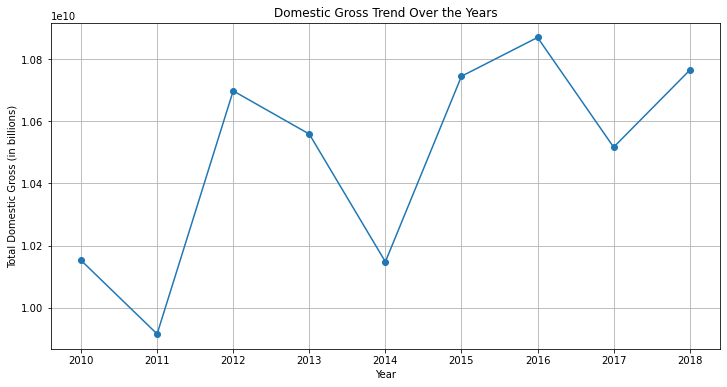

In [14]:
#lets see the domestic gross trend for each year

# lets group the DataFrame by 'year' and calculate the sum of 'domestic_gross' for each year
domestic_gross_trend = dropped_.groupby('year')['domestic_gross'].sum()

# lets create a line plot
plt.figure(figsize=(12, 6))
plt.plot(domestic_gross_trend.index, domestic_gross_trend.values, marker='o', linestyle='-')


plt.xlabel('Year')
plt.ylabel('Total Domestic Gross (in billions)')
plt.title('Domestic Gross Trend Over the Years')

# Show the plot
plt.grid(True)
plt.show()


from the graph above we can tell the fluctuation in total domestic gross over the years .perks of every business right?.you never know how tomorrow will be .in this case how the next year will be so for our studio we will defietely look into what 2016 did to carry the trophy of doing that great in domestic gross

In [15]:
#we will get the mean of  domestic_gross in  each year
dyearly_gross_mean = dropped_.groupby('year')['domestic_gross'].mean()
dyearly_gross_mean

year
2010    3.296345e+07
2011    3.419203e+07
2012    4.402413e+07
2013    5.279425e+07
2014    4.336745e+07
2015    5.655194e+07
2016    5.661299e+07
2017    5.941676e+07
2018    6.222173e+07
Name: domestic_gross, dtype: float64

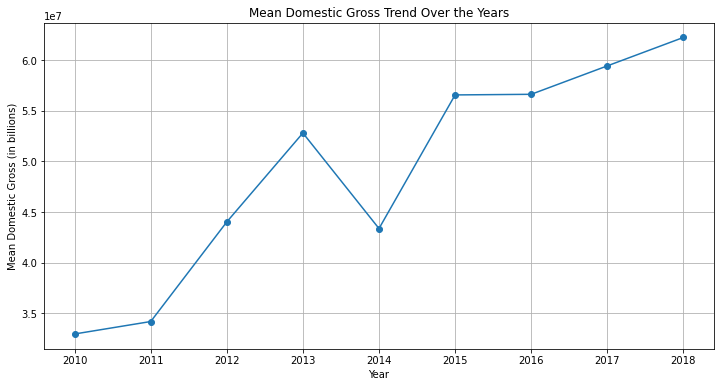

In [16]:

#lets creat a  the line plot
plt.figure(figsize=(12, 6))
plt.plot(dyearly_gross_mean.index, dyearly_gross_mean.values, marker='o',linestyle='-')


plt.xlabel('Year')
plt.ylabel('Mean Domestic Gross (in billions)')
plt.title('Mean Domestic Gross Trend Over the Years')

# Show the plot
plt.grid(True)
plt.show()


from the total domestic plot  we did see that 2016 did really wellin total domestic gross but in average  of their performance not so well compared to 2018.mmh!that means there were those certain times in 2016 that domestic gross did really bad and those cerain times it did very good and as of 2018 there was a sense of consistency so we have to reconsider in checking so much in 2016 and focus on the consistency of 2018

In [17]:
#the minimum  domestic_gross across in each year
min_dyearly_gross = dropped_.groupby('year')['domestic_gross'].min()
min_dyearly_gross

year
2010      800.0
2011      700.0
2012      400.0
2013      900.0
2014      800.0
2015     6700.0
2016    10500.0
2017      700.0
2018     1300.0
Name: domestic_gross, dtype: float64

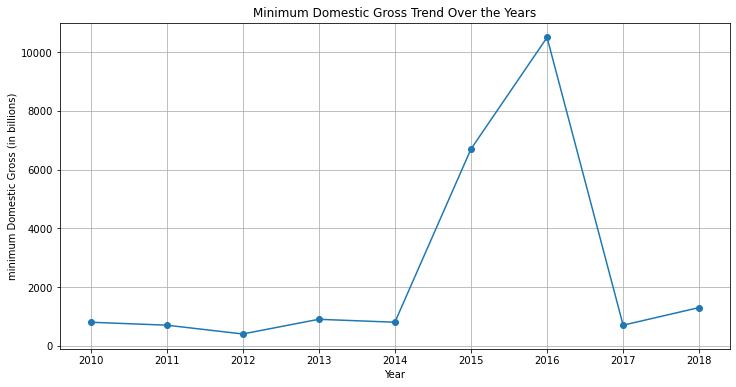

In [18]:
#lets see the trend of minimum gross
#lets creat a  the line plot
plt.figure(figsize=(12, 6))
plt.plot(min_dyearly_gross.index, min_dyearly_gross.values, marker='o',linestyle='-')


plt.xlabel('Year')
plt.ylabel('minimum Domestic Gross (in billions)')
plt.title('Minimum Domestic Gross Trend Over the Years')

# Show the plot
plt.grid(True)
plt.show()


2012 did disappoint in producing the value with lowest domestic gross well again doing good in the chart is 2016.mmh should we reconsider  in focusing on that year? well see.

In [19]:
#studio with the minimum total_domestic gross across the years
studio_with_min_domestic_gross = dyearly_gross.idxmin()
studio_with_min_domestic_gross

domestic_gross    (W/Dim., 2017)
dtype: object

In [20]:
# lets check  the standard deviation of the total domestic_gross yearly
dyearly_gross_std = dyearly_gross.std()
dyearly_gross_std

domestic_gross    4.453201e+08
dtype: float64

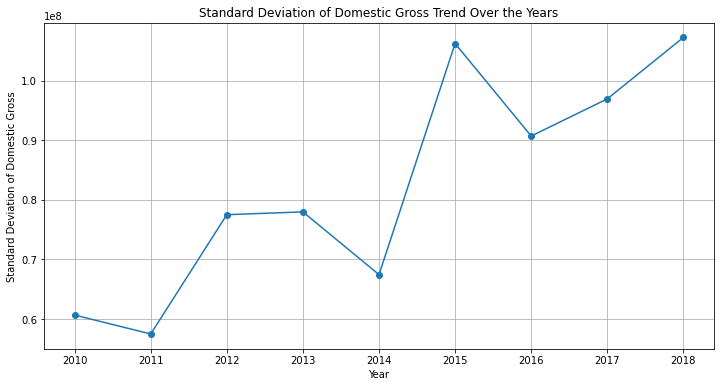

In [21]:
#lets look into the standard deviation in each year
dyearly_gross_std = dropped_.groupby('year')['domestic_gross'].std()
dyearly_gross_std
#lets see the trend in that

# lets Set up the line plot
plt.figure(figsize=(12, 6))
plt.plot(dyearly_gross_std.index, dyearly_gross_std.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Domestic Gross')
plt.title('Standard Deviation of Domestic Gross Trend Over the Years')

# Show the plot
plt.grid(True)
plt.show()


we might be wondering  from this dataframe, which of this studios can we,  as a new studio now bench mark from based on their gross. we are going to amount the total gross ,that is the domestic  and now analize from the data obtained which of the studios are doing the best every year

In [22]:

#lets check on how well the studios have been performing in terms of the domestic gross 
studio_domestic_gross = dropped_.groupby('studio')['domestic_gross'].sum()

# we now Sort studios in descending order based on their total domestic gross
studio_ = studio_domestic_gross.sort_values(ascending=False)

print("Studios ranked from highest to lowest based on domestic gross:")
print(studio_.head())


Studios ranked from highest to lowest based on domestic gross:
studio
BV      1.839653e+10
Uni.    1.289204e+10
WB      1.212360e+10
Fox     1.092450e+10
Sony    8.459479e+09
Name: domestic_gross, dtype: float64


above you will notice the studios that actually rank the highest in domestic gross that is BV,UNI,WB,FOX and SONY.and will prolly  be having ours truly microsoft studio in the top numbers soon when it comes to domestic gross.
you might be asking what is this domestic gross and forign gross,?Domestic gross is the monetary value of all finished services,in this case , made within a countryduring a specific period . for foreign gross it is produced within a country's borders in a specific time period.

In [23]:
#Which years had the highest overall movie revenues


# Calculate the domestic revenue 
dropped_['total_revenue'] = dropped_['domestic_gross']

# Sort the DataFrame from highest to lowest based on 'total_revenue'
movie_data_df_sorted = dropped_.sort_values(by='total_revenue', ascending=False)

# Get the title with the highest revenue (the first row after sorting)
highest_revenue_title = movie_data_df_sorted.iloc[0]['title']

print("Title with the highest revenue:", highest_revenue_title)


Title with the highest revenue: Star Wars: The Force Awakens


<ipython-input-23-ee1f1d2e3d44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_['total_revenue'] = dropped_['domestic_gross']


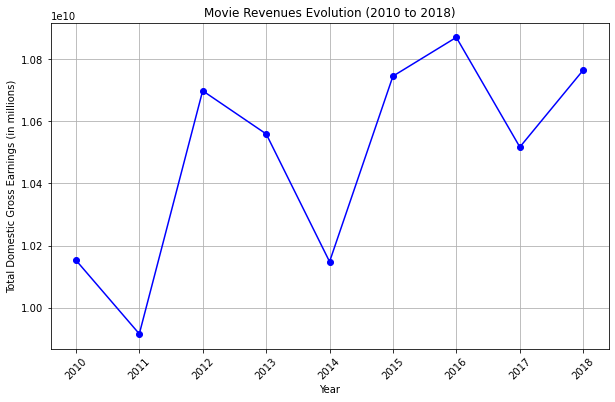

In [24]:
dropped_ = dropped_.copy()
#lets see how  movie revenues evolved over the years from 2010 to 2018
# lets convert the 'year' column to datetime type for easy sorting
dropped_['year'] = pd.to_datetime(dropped_['year'], format='%Y')

# Group the data by year and calculate the total gross earnings for each year
yearly_revenues = dropped_.groupby(dropped_['year'])['domestic_gross'].sum()

yearly_revenues = yearly_revenues.reset_index()
# Plot the trend of total domestic gross earnings over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_revenues['year'], yearly_revenues['domestic_gross'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Domestic Gross Earnings (in millions)')
plt.title('Movie Revenues Evolution (2010 to 2018)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# OBSERVATION
from the dataset we can definately observe that there is Potential for Profitability: The increasing revenue trend indicates that there is potential for profitability in the movie industry. well it is also very imortant to understand success is not guaranteed.but we can look at the best movie that produced the best domestic gross and we can have hypothetical analysis of why we think it did so well.

1. we can always come to a conclusion that the succes of star wars : the force awakens can be attributed to its high production values and  engaging storytelling. For microsoft new studio, investing in quality production and marketing efforts is crucial to attract audiences and build a reputation.

2. to come up with a movie like star wars: the force awakens one requires long-term planning and a cohesive vision for multiple films. microsoft new studios should consider their long-term strategy and potential for creating sequels or spin-offs if their initial projects are successful.

3. the movie demonstrates the importance of understanding audience demand and catering to their preferences. Conducting market research and identifying audience interests can guide content creation decisions.

there are a number of hypothetical analysis we can get from that but those are but a few

# name.basics.csv

In [25]:
#will give a variable name  to the name dataframe 
name_df = pd.read_csv('mydata/name.basics.csv')
name_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [26]:
name_df.info


<bound method DataFrame.info of            nconst         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  \
0              miscellaneous,production_manager,producer   
1             composer,music_department,sound_departmen

In [27]:
#look into the column names of oure dataframe that contains 606648 rows and 6 columns .this is a huge dataset
name_df.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [28]:
name_df.isnull().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [29]:
#remove leading and trailing whitespaces from each column name in the DataFrame.
name_df.columns = name_df.columns.str.strip()
name_df.columns


Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [30]:

# Extract the "primary_profession" and primary name columns
primary_professions = name_df[['primary_profession', 'primary_name']]

# Display the primary professions
print(primary_professions)


                                      primary_profession         primary_name
0              miscellaneous,production_manager,producer    Mary Ellen Bauder
1             composer,music_department,sound_department         Joseph Bauer
2                             miscellaneous,actor,writer           Bruce Baum
3       camera_department,cinematographer,art_department         Axel Baumann
4       production_designer,art_department,set_decorator          Pete Baxter
...                                                  ...                  ...
606643                                           actress         Susan Grobes
606644                                           actress          Joo Yeon So
606645                                           actress       Madeline Smith
606646                                          producer  Michelle Modigliani
606647                             director,actor,writer       Pegasus Envoyé

[606648 rows x 2 columns]


In [31]:
#lets see which is the most common proffession
# Split the comma-separated values in the "primary_profession" column and create a list of all primary professions
all_primary_professions = name_df['primary_profession'].str.split(',').explode()

# Count the occurrences of each primary profession
most_common_profession = all_primary_professions.value_counts().idxmax()

print("Most common primary profession:", most_common_profession)


Most common primary profession: actor


In [32]:

name_counts = name_df['primary_name'].value_counts()

# Get the maximum count of primary professions
max_primary_professions = name_counts.max()

# Find the names with the highest count of primary professions
people_with_most_professions = name_counts[name_counts == max_primary_professions].index.tolist()

print("People with the most primary professions:", people_with_most_professions)


People with the most primary professions: ['James Brown', 'Michael Brown']


In [33]:
#lets se who had many movie titles
# Count the number of titles for each person
name_df['num_titles'] = name_df['known_for_titles'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Find the person with the most titles
person_with_most_titles = name_df[name_df['num_titles'] == name_df['num_titles'].max()]

# Display the person with the most titles
print(person_with_most_titles[['primary_name', 'num_titles']])


          primary_name  num_titles
134723  Lisa Holmqvist           6
312090  Ana Dumitrescu           6


# OBSERVATION
there wasn't much to get from the above dataset but we  got people who had so  many proffesions and we definately can get information from them about how having many  or less profession could affect the running and success of a movie also got those who  had many movie titles seems there is something extra ordinary that they doing that we could definately borrow from them to determine what success rate that can lead to our movie production success

# rt.movie_info.tsv

In [49]:
movie_info = pd.read_csv("mydata/rt.movie_info.tsv", delimiter='\t')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [35]:
movie_info.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Acti

In [36]:
movie_info.columns


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [37]:
#missing values
missing_info = movie_info.isnull()
missing_info_count = missing_info.sum()
print(missing_info_count[missing_info_count > 0])


synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


we will drop all null values 

In [41]:
movie_cleaned = movie_info.dropna()


In [42]:
movie_cleaned.isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [43]:
#rating of most movies

# Calculate the mode of the 'rating' column
most_common_rating = movie_cleaned['rating'].mode().iloc[0]

print("Rating of most movies:", most_common_rating)


Rating of most movies: R


In [44]:
# lets  Count the occurrences of each rating
rating_counts = movie_info['rating'].value_counts()

print("Count of each rating:")
print(rating_counts)


Count of each rating:
R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64


In [45]:

#lets see the occurance release date of r rated movies for borh theeter and dvd
# Filter the DataFrame to include only movies with an "R" rating
r_rated_movies = movie_info[movie_info['rating'] == 'R']

# Combine the 'theater_date' and 'dvd_date' columns to get the streaming months
streaming_dates = pd.concat([r_rated_movies['theater_date'], r_rated_movies['dvd_date']])

# Extract the month from the combined streaming dates
streaming_months = pd.to_datetime(streaming_dates, errors='coerce').dt.month

# Remove any NaN or invalid date entries
streaming_months = streaming_months.dropna()

# Get the count of movies streamed in each month
streaming_months_count = streaming_months.value_counts()

# Sort the result by month (January to December)
streaming_months_count = streaming_months_count.sort_index()

print("Number of R-rated movies streamed in each month:")
print(streaming_months_count)


Number of R-rated movies streamed in each month:
1.0     81
2.0     75
3.0     78
4.0     79
5.0     70
6.0     83
7.0     56
8.0     86
9.0     86
10.0    96
11.0    71
12.0    77
dtype: int64


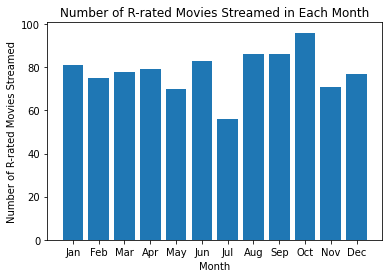

In [46]:
# Plotting the data
plt.bar(streaming_months_count.index, streaming_months_count.values)
plt.xlabel('Month')
plt.ylabel('Number of R-rated Movies Streamed')
plt.title('Number of R-rated Movies Streamed in Each Month')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


from the above we are able to tell that the best time of the month to release R rated movies is October because in box office have shown that the time most R rated are released 

 movies that are viewed the most are rated R. restricted so we can pick on that in our analysis for our new studio

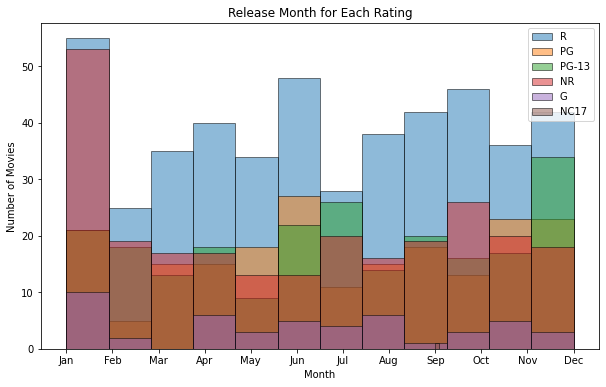

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the 'theater_date' column is in a string format like 'Dec 18, 2009'
movie_info['theater_date'] = pd.to_datetime(movie_info['theater_date'])

# Create a new column 'release_month' to store the month information
movie_info['release_month'] = movie_info['theater_date'].dt.month

# Drop rows with missing values in the 'release_month' column
movie_info = movie_info.dropna(subset=['release_month'])

# Plotting the release month for each rating
plt.figure(figsize=(10, 6))
for rating in movie_info['rating'].unique():
    plt.hist(movie_info[movie_info['rating'] == rating]['release_month'], bins=12, alpha=0.5, edgecolor='black', label=rating)

plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title('Release Month for Each Rating')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [53]:
movie_info['genre']

0                     Action and Adventure|Classics|Drama
1                       Drama|Science Fiction and Fantasy
2                       Drama|Musical and Performing Arts
3                              Drama|Mystery and Suspense
5                                   Drama|Kids and Family
                              ...                        
1555     Action and Adventure|Horror|Mystery and Suspense
1556                   Comedy|Science Fiction and Fantasy
1557    Classics|Comedy|Drama|Musical and Performing Arts
1558      Comedy|Drama|Kids and Family|Sports and Fitness
1559    Action and Adventure|Art House and Internation...
Name: genre, Length: 1201, dtype: object

In [54]:
# the most movie  common genre
most_common_genre = movie_info['genre'].mode().iloc[0]

print("most common movie genre:", most_common_genre)


most common movie genre: Drama


<ipython-input-55-84fcb2b6d07d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['genre'] = movie_info['genre'].str.split('|')


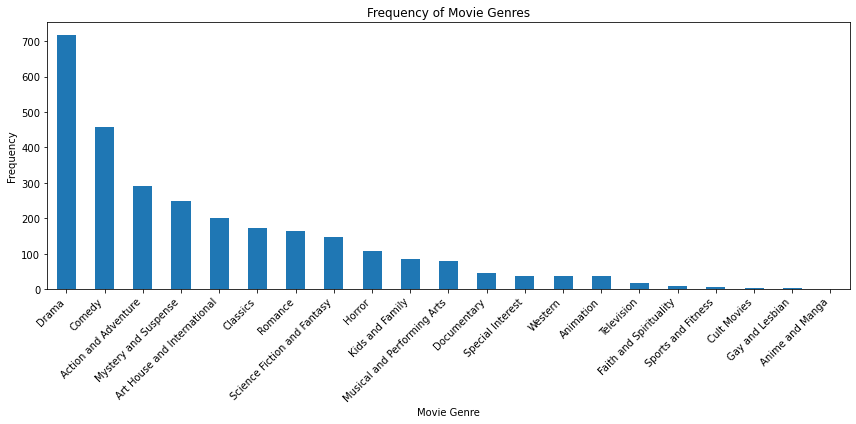

In [55]:
# lets Split the 'genre' column by '|' and explode the values into separate rows
movie_info['genre'] = movie_info['genre'].str.split('|')
movie_info_exploded = movie_info.explode('genre')

# Count the frequency of each genre
genre_counts = movie_info_exploded['genre'].value_counts()

# Plot the frequency of movie genres using a bar plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Movie Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#lets look at what box office revenue was fro each genre

# Convert the 'box_office' column to numeric (remove commas and dollar signs) for sorting correctly
#movie_cleaned['box_office'] = pd.to_numeric(movie_cleaned['box_office'].replace('[\$,]', '', regex=True))

# Sort the DataFrame by 'box_office' in descending order
top_10_earnings_movies = movie_cleaned.sort_values(by='box_office', ascending=False).head(10)

# Display the top ten movies with the highest box office earnings
print(top_10_earnings_movies[['id', 'genre', 'box_office']])


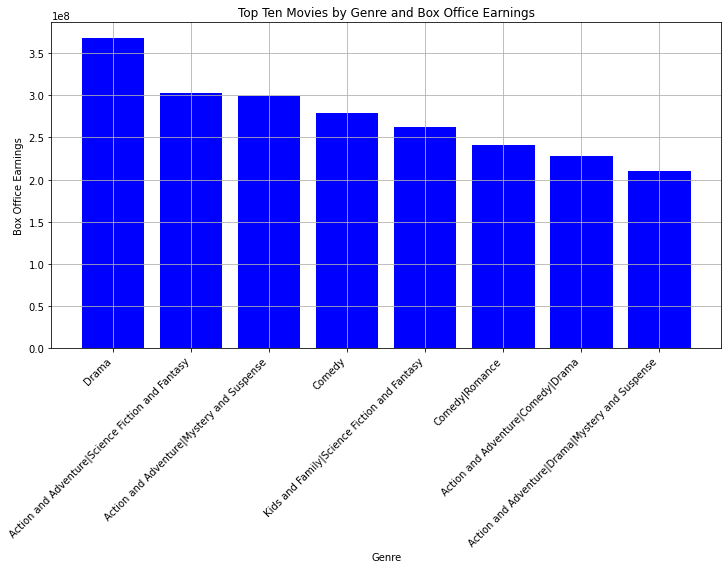

In [56]:
#lets see how much revenue was from each genre
# Assuming you have the DataFrame containing the genre and box office information
data = {
    'genre': ['Drama', 'Action and Adventure|Science Fiction and Fantasy',
              'Action and Adventure|Mystery and Suspense', 'Comedy', 'Kids and Family|Science Fiction and Fantasy',
              'Comedy|Romance', 'Action and Adventure|Science Fiction and Fantasy',
              'Action and Adventure|Comedy|Drama', 'Action and Adventure|Science Fiction and Fantasy',
              'Action and Adventure|Drama|Mystery and Suspense'],
    'box_office': [368000000, 303001229, 299300000, 279167575, 261835892,
                   241250669, 234141872, 227946274, 214813155, 209805005]
}

df = pd.DataFrame(data)

# Set up the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df['genre'], df['box_office'], color='b')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Box Office Earnings')
plt.title('Top Ten Movies by Genre and Box Office Earnings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()


drama movies have has the highest frequency therefore getting us to a conclusion that that genre of movie has the best reception

we definatly can tell that R rating and drama genre are what make to the most movies stream .with alot of note we can sure work with that in our new studio

In [57]:
#now for the directors that direct most movies
# Use value_counts() to count occurrences of each director
director_counts = movie_info['director'].value_counts()

# Find the top directors with the most movies (you can specify the number of top directors you want to see, e.g., top 5)
top_directors = director_counts.head(5)  # Change '5' to the desired number of top directors

print("Top directors with the most movies:")
print(top_directors)


Top directors with the most movies:
Steven Spielberg    10
Clint Eastwood       8
Jim Jarmusch         4
Ridley Scott         4
Barry Levinson       4
Name: director, dtype: int64


Steven spielberg directed most movies.

we will now take a look at how the runtime of movies vary across different genres

In [58]:
movie_info = pd.DataFrame({'genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama'],
                           'runtime': [120, 95, 110, 130, 100, 120]})


In [59]:
average_runtime_by_genre = movie_info.groupby('genre')['runtime'].mean()
average_runtime_by_genre

genre
Action    125.0
Comedy     97.5
Drama     115.0
Name: runtime, dtype: float64

In [ ]:
# bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
average_runtime_by_genre = movie_info.groupby('genre')['runtime'].mean()
average_runtime_by_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime of Movies Across Different Genres (Bar Plot)')
plt.xticks(rotation=45)  # Optional: Rotate the x-axis labels for better readability
plt.show()


what is the relationship between the movie's rating and its box office revenue .we will plot  a scatter plot to see the relationship the got


In [60]:
movie_cleaned.columns


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [61]:
movie_cleaned.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

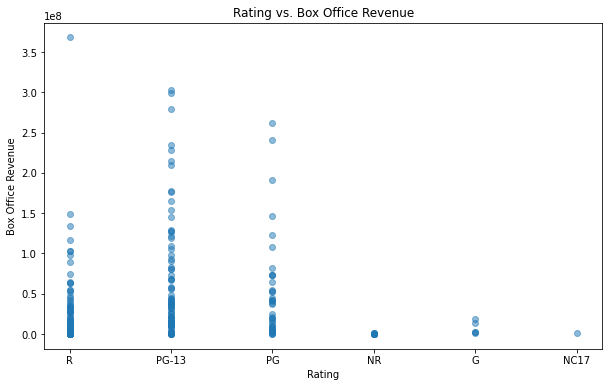

In [62]:
#lets look at which rating has the highest box revenue
movie_cleaned_copy = movie_cleaned.copy()

#lets clean the 'box_office' column by removing currency symbols and commas and converting it to numeric values
movie_cleaned_copy.loc[:, 'box_office'] = movie_cleaned_copy['box_office'].replace('[\$,]', '', regex=True).astype(float)

# Plot a scatter plot to visualize the relationship between rating and box office revenue
plt.figure(figsize=(10, 6))
plt.scatter(movie_cleaned_copy['rating'], movie_cleaned_copy['box_office'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Box Office Revenue')
plt.title('Rating vs. Box Office Revenue')
plt.show()


In [63]:
#lets get the average runtime for each movie genre
average_runtime = movie_info.groupby('genre')['runtime'].mean()
print(average_runtime)

genre
Action    125.0
Comedy     97.5
Drama     115.0
Name: runtime, dtype: float64


In [64]:
min_runtime = movie_info.groupby('genre')['runtime'].min()
max_runtime = movie_info.groupby('genre')['runtime'].max()

print(min_runtime)
print(max_runtime)



genre
Action    120
Comedy     95
Drama     110
Name: runtime, dtype: int64
genre
Action    130
Comedy    100
Drama     120
Name: runtime, dtype: int64


# OBSERVATION
From this data set microsoft can make an informed decision on incligning more on drama movies that are R rated. There is definately  a good reception to that. we can tell from the occurrences of the drama and the R rated movies.Another major thing to note is that the R rated movies do  very well if they are realeased in october so if microsoft is to venture in producing R rated drama movies well then are sure to do their release in october .microsoft can also work in producing NR rated and PG rated movies coz they are in the three top most occuring ratings    

# title.akas.csv

In [65]:
title = pd.read_csv('mydata/title.akas.csv')
title

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [66]:
title.info

<bound method DataFrame.info of          title_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru    NaN   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención    NaN   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language    

In [67]:
title.columns

Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [68]:
title.shape

(331703, 8)

In [70]:
missing_title = title.isnull()
missing_title_count = missing_title.sum()
print(missing_title_count[missing_title_count > 0])


region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64


In [69]:
# Count the occurrences of each language
language_counts = title['language'].value_counts()

# Find the most common language
most_common_language = language_counts.idxmax()

print("Most common language of titles:", most_common_language)


Most common language of titles: en


In [72]:
# Count the occurrences of each region
region_counts = title['region'].value_counts()

# Get the most common region
most_common_region = region_counts.idxmax()

print("Most common region of titles:", most_common_region)


Most common region of titles: US


In [74]:
# Filter the DataFrame to include only titles in the USA (region code 'US')
titles_in_usa = title[title['region'] == 'US']

# Count the occurrences of each title in the USA
title_usa = titles_in_usa['title']
print("The titles in the USA:")


The titles in the USA:


In [75]:

title['tconst'] = title['title_id']

# Display the updated DataFrame
print(title)


         title_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru    NaN   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención    NaN   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language        types   attributes  is_origi

# observation
microsoft new studio has to be be vigilant to the region they chose to first reliese their movies .From the dataset above releasing movie in the USA has plobably be leading to the success of box office studio.again the reception of the english language is really great coz as we can see most movies are produced and released in English . we looked  at what titles were released in USA and we can further look into the common factor in those movies that might have contributed to the success of box office studio

# title.crew.csv

In [76]:
crew_df = pd.read_csv('mydata/title.crew.csv')
crew_df

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [77]:
crew_df = crew_df.dropna()
crew_df

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"
...,...,...,...
146137,tt8998302,nm10121510,nm10121510
146138,tt8999892,nm10122247,"nm10122247,nm10122246"
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477


In [78]:
title_df = pd.read_csv('mydata/title.principals.csv')
title_df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [79]:
title_df.info

<bound method DataFrame.info of             tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...    

In [80]:
title_df.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')

In [81]:
title_df.shape

(1028186, 6)

In [82]:
title_df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


# title.ratings.csv

In [83]:
title_rating = pd.read_csv('mydata/title.ratings.csv')
title_rating

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [84]:
title_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [85]:
missing_ratings = title_rating.isnull()
missing_count = missing_ratings.sum()
print(missing_count )

tconst           0
averagerating    0
numvotes         0
dtype: int64


In [86]:
title_rating.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [87]:

# Sort the DataFrame by 'averagerating' in descending order
df_sorted_by_rating = title_rating.sort_values(by='averagerating', ascending=False)

# Display the top movies or TV shows with the highest average ratings
top_rated_items = df_sorted_by_rating.head()
print(top_rated_items)


          tconst  averagerating  numvotes
27644  tt8730716           10.0         5
8992   tt1770682           10.0         5
26153  tt2632430           10.0         5
65033  tt9715646           10.0        20
57679  tt5344358           10.0         6


In [88]:
# lets determine which movies or TV shows have received the most votes to understand their popularity and engagement.
sorted_df = title_rating.sort_values(by='numvotes', ascending=False)

# Display the top items with the most votes
print(sorted_df.head())


          tconst  averagerating  numvotes
63498  tt1375666            8.8   1841066
8738   tt1345836            8.4   1387769
24920  tt0816692            8.6   1299334
38058  tt1853728            8.4   1211405
48221  tt0848228            8.1   1183655


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

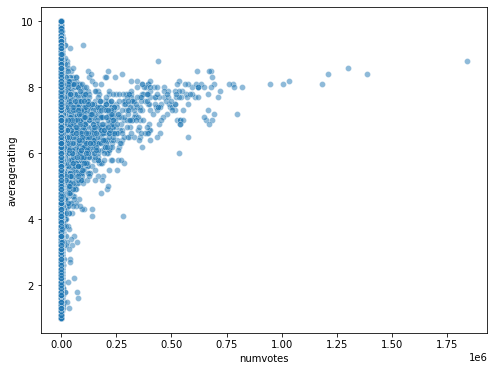

In [90]:
#lets Analyze if there's any correlation between the average rating and the number of votes.
import seaborn as sns
rating_df = title_rating[['averagerating', 'numvotes']]

# Calculating the correlation coefficient (Pearson correlation)
correlation_coefficient = rating_df['averagerating'].corr(rating_df['numvotes'])

# Creating a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_df, x='numvotes', y='averagerating', alpha=0.5)
plt.title


 it indicates a strong negative relationship , it indicates little to no linear relationship between average rating and the number of votes.

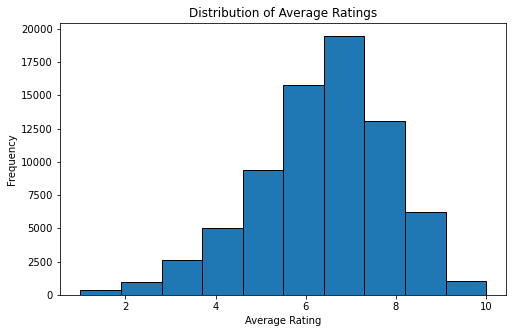

In [91]:
#lets see distribution of average ratings to understand how ratings are spread across our dataframe.
# Create a histogram
plt.figure(figsize=(8, 5))
plt.hist(title_rating['averagerating'], bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()


In [92]:
# Let's join title, title_rating on the 'tconst' column
joined_df = pd.merge(title, title_rating, on='tconst')

# Sort the joined DataFrame in descending order based on 'numvotes'
sorted_df = joined_df.sort_values(by='numvotes', ascending=False)

# Get the movie with the highest number of votes (first row after sorting)
highest_num_votes_movie = sorted_df.iloc[0]

print("Movie with the highest number of votes:")
print(highest_num_votes_movie)


Movie with the highest number of votes:
title_id             tt1375666
ordering                    20
title                Inception
region                     NaN
language                   NaN
types                 original
attributes                 NaN
is_original_title            1
tconst               tt1375666
averagerating              8.8
numvotes               1841066
Name: 7281, dtype: object


from above we can see that inception  was the movie with the highest votes

#  observation 
microsoft needs to understand that as the average rating of a movie increases, the number of votes tends to decrease. This might happen because movies with extremely high ratings might be niche or have limited appeal, attracting a smaller but highly enthusiastic audience. Conversely, movies with low ratings might have a broader appeal and attract a larger audience, resulting in more votes.

Implication: If the goal of the new studio is to produce high-quality, critically acclaimed movies with potentially limited commercial appeal, this negative correlation might be expected. The studio could focus on producing  experimental projects that might receive high ratings from a niche audience but not necessarily generate massive vote counts.

# tmdb.movies.csv

In [93]:
movies_df = pd.read_csv('mydata/tmdb.movies.csv')
movies_df


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


The  dataset contains information about movies, including their genre IDs, IDs, original language, original title, popularity, release date, title, vote average, and vote count.

In [94]:
movies_df.info

<bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-

In [95]:
movies_df.isnull().count() #gives count of non-null values.we can say this dataset has no missing values

Unnamed: 0           26517
genre_ids            26517
id                   26517
original_language    26517
original_title       26517
popularity           26517
release_date         26517
title                26517
vote_average         26517
vote_count           26517
dtype: int64

In [96]:
movies_df.duplicated().sum()

0

In [97]:
#lets identify most popular movies based on popularity score
# Assuming your DataFrame is named 'df'

# Sort the DataFrame in descending order based on 'popularity'
sorted_df = movies_df.sort_values(by='popularity', ascending=False)

# Display the top 10 most popular movies
top_10_popular_movies = sorted_df.head(10)
print(top_10_popular_movies[['original_title', 'popularity']])


                                    original_title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


In [98]:
#lets find the movies with the highest vote_average (average rating)
# Sorting the DataFrame in descending order based on 'vote_average'
df_sorted_by_vote_average = movies_df.sort_values(by='vote_average', ascending=False)

# Displaying the top movies with the highest vote_average
movies_with_highest_vote_average = df_sorted_by_vote_average.head()

# Printing the result
print(movies_with_highest_vote_average[['title', 'vote_average']])


                                                   title  vote_average
13258                                  9/11: Simulations          10.0
22787         Lasagna Cat - Telephone Sex Survey Results          10.0
22592                                  MOTO 9: The Movie          10.0
22607                                 The Letter Carrier          10.0
22610  Hope This Goes Over Well/Living in an Empty World          10.0


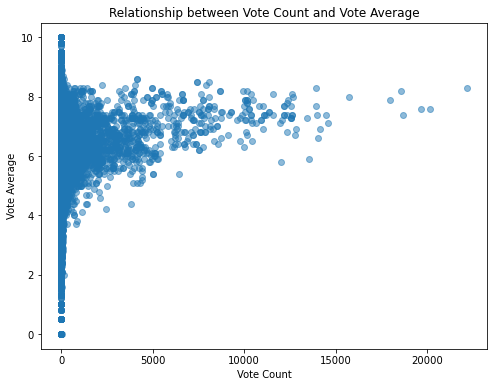

Correlation Coefficient: 0.08636988831138752


In [99]:
#lets examine the relationship between vote_count and vote_average to see if more votes correlate with higher ratings.
# Select the 'vote_count' and 'vote_average' columns from the DataFrame
vote_count = movies_df['vote_count']
vote_average = movies_df['vote_average']

# Create a scatter plot to visualize the relationship between 'vote_count' and 'vote_average'
plt.figure(figsize=(8, 6))
plt.scatter(vote_count, vote_average, alpha=0.5)
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.title('Relationship between Vote Count and Vote Average')
plt.show()

# Calculate the correlation coefficient between 'vote_count' and 'vote_average'
correlation_coefficient = vote_count.corr(vote_average)
print("Correlation Coefficient:", correlation_coefficient)


it indicates a strong negative relationship , it indicates little to no linear relationship between 'vote_count' and 'vote_average'

In [100]:
# lets mean, median, minimum, and maximum for vote_average, vote_count, and popularity. 

# Calculate mean, median, minimum, and maximum for 'vote_average'
vote_average_mean = movies_df['vote_average'].mean()
vote_average_median = movies_df['vote_average'].median()
vote_average_min = movies_df['vote_average'].min()
vote_average_max = movies_df['vote_average'].max()

# Calculate mean, median, minimum, and maximum for 'vote_count'
vote_count_mean = movies_df['vote_count'].mean()
vote_count_median = movies_df['vote_count'].median()
vote_count_min = movies_df['vote_count'].min()
vote_count_max = movies_df['vote_count'].max()

# Calculate mean, median, minimum, and maximum for 'popularity'
popularity_mean = movies_df['popularity'].mean()
popularity_median = movies_df['popularity'].median()
popularity_min = movies_df['popularity'].min()
popularity_max = movies_df['popularity'].max()

# Print the results
print("Vote Average:")
print("Mean:", vote_average_mean)
print("Median:", vote_average_median)
print("Minimum:", vote_average_min)
print("Maximum:", vote_average_max)
print("\n")

print("Vote Count:")
print("Mean:", vote_count_mean)
print("Median:", vote_count_median)
print("Minimum:", vote_count_min)
print("Maximum:", vote_count_max)
print("\n")

print("Popularity:")
print("Mean:", popularity_mean)
print("Median:", popularity_median)
print("Minimum:", popularity_min)
print("Maximum:", popularity_max)


Vote Average:
Mean: 5.991281064977184
Median: 6.0
Minimum: 0.0
Maximum: 10.0


Vote Count:
Mean: 194.22483689708488
Median: 5.0
Minimum: 1
Maximum: 22186


Popularity:
Mean: 3.130912244974922
Median: 1.374
Minimum: 0.6
Maximum: 80.773


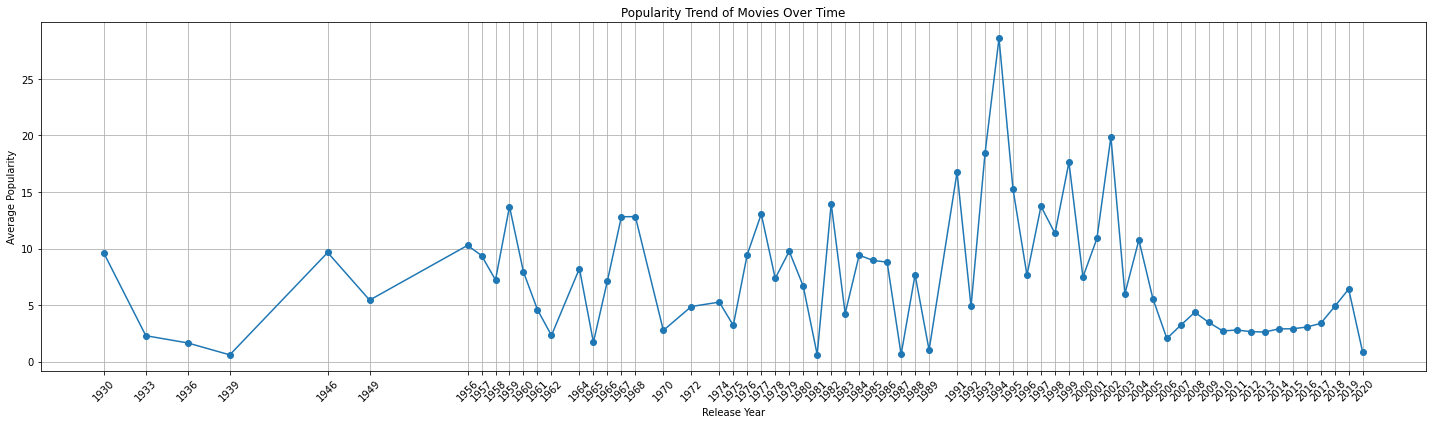

In [101]:
#lets Analyze the popularity trend of movies over time using the release_date and popularity columns.

# Convert 'release_date' to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the year from the 'release_date' column
movies_df['release_year'] = movies_df['release_date'].dt.year

# Group the data by release_year and calculate the mean popularity for each year
popularity_trend = movies_df.groupby('release_year')['popularity'].mean().reset_index()

# Plot the popularity trend over time using a line chart
plt.figure(figsize=(20, 6))
plt.plot(popularity_trend['release_year'], popularity_trend['popularity'], marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Popularity Trend of Movies Over Time')
plt.grid(True)
plt.xticks(popularity_trend['release_year'], rotation=45)
plt.tight_layout()
plt.show()


# tn.movie_budgets.cs

In [102]:
#load the budgets dataset
budget = pd.read_csv('mydata/tn.movie_budgets.csv')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [103]:
budget.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

In [104]:
#Change the data type of production_budget	domestic_gross	worldwide_gross to float and remove the dollar sign.

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_to_convert:
    budget[col] = budget[col].replace({'\$': '', ',': ''}, regex=True).astype('float64')

In [105]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [106]:
budget_duplicates = budget.duplicated().sum()
budget_duplicates

0

In [107]:
columns = budget.columns
columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [108]:
type(budget)

pandas.core.frame.DataFrame

In [109]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [112]:
#We can analyze the domestic and worldwide gross to determine the financial success of each movie
# Calculate Return on Investment (ROI) and Net Earnings
budget['ROI'] = ((budget['worldwide_gross'] - budget['production_budget']) / budget['production_budget']) * 100
budget['Net_Earnings'] = budget['worldwide_gross'] - budget['production_budget']

# Sort by ROI to identify the most profitable and underperforming movies
df_sorted_by_roi = budget.sort_values(by='ROI', ascending=False)

# Print the results
print(df_sorted_by_roi[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI', 'Net_Earnings']])


                                  movie  production_budget  domestic_gross  \
5745                        Deep Throat            25000.0      45000000.0   
5613                            Mad Max           200000.0       8750000.0   
5492                Paranormal Activity           450000.0     107918810.0   
5679                        The Gallows           100000.0      22764410.0   
5406            The Blair Witch Project           600000.0     140539099.0   
...                                 ...                ...             ...   
5522                           Pancakes           400000.0             0.0   
5521                            Show Me           400000.0             0.0   
5520            My Beautiful Laundrette           400000.0             0.0   
5116                          Checkmate          1500000.0             0.0   
4982  No Man's Land: The Rise of Reeker          2000000.0             0.0   

      worldwide_gross            ROI  Net_Earnings  
5745      

In [113]:
#lets see the movie that had the lowest production budget
# Sort the DataFrame by 'production_budget' in ascending order
lowest_budget_movie = budget.sort_values(by='production_budget').head(1)

# Display the movie with the lowest production budget
print(lowest_budget_movie)


      id release_date              movie  production_budget  domestic_gross  \
5781  82  Aug 5, 2005  My Date With Drew             1100.0        181041.0   

      worldwide_gross           ROI  Net_Earnings  
5781         181041.0  16358.272727      179941.0  


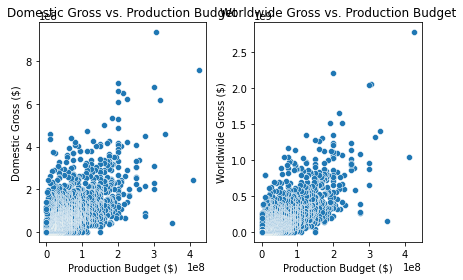

In [114]:
#compare the production budget with the domestic and worldwide gross 
#so as understand the relationship between the investment made in a movie and its financial return.
# Domestic Gross vs. Production Budget
plt.subplot(1, 2, 1)
sns.scatterplot(x='production_budget', y='domestic_gross', data=budget)
plt.title('Domestic Gross vs. Production Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')

# Worldwide Gross vs. Production Budget
plt.subplot(1, 2, 2)
sns.scatterplot(x='production_budget', y='worldwide_gross', data=budget)
plt.title('Worldwide Gross vs. Production Budget')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.tight_layout()
plt.show()


In [115]:
# Sort the DataFrame by ROI in descending order
df_sorted_by_roi = df_sorted_by_roi.sort_values(by='ROI', ascending=False)

# Get the top ten successful movies based on ROI
top_10_successful_movies = df_sorted_by_roi.head(10)

# Print the results
print("Top 10 Most Successful Movies based on ROI:")
print(top_10_successful_movies[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI', 'Net_Earnings']])


Top 10 Most Successful Movies based on ROI:
                         movie  production_budget  domestic_gross  \
5745               Deep Throat            25000.0      45000000.0   
5613                   Mad Max           200000.0       8750000.0   
5492       Paranormal Activity           450000.0     107918810.0   
5679               The Gallows           100000.0      22764410.0   
5406   The Blair Witch Project           600000.0     140539099.0   
5709             Super Size Me            65000.0      11529368.0   
5346                     Bambi           858000.0     102797000.0   
5773               El Mariachi             7000.0       2040920.0   
5676  Night of the Living Dead           114000.0      12087064.0   
5210                     Rocky          1000000.0     117235147.0   

      worldwide_gross            ROI  Net_Earnings  
5745       45000000.0  179900.000000    44975000.0  
5613       99750000.0   49775.000000    99550000.0  
5492      194183034.0   43051.785333 

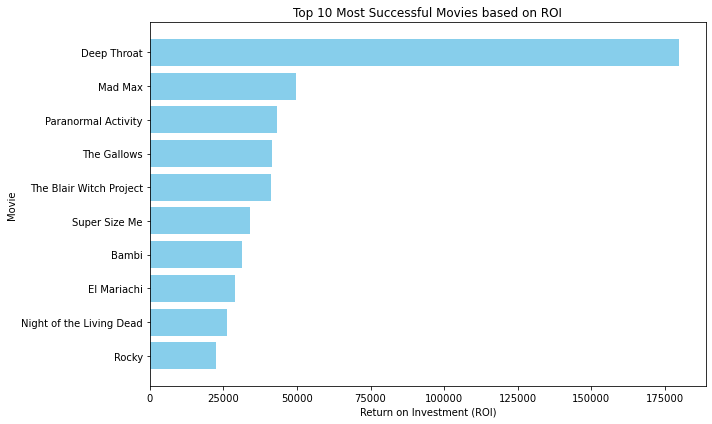

In [116]:
movies = top_10_successful_movies['movie']
roi_values = top_10_successful_movies['ROI']

# Create a bar plot for the top 10 successful movies based on ROI
plt.figure(figsize=(10, 6))
plt.barh(movies, roi_values, color='skyblue')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Movie')
plt.title('Top 10 Most Successful Movies based on ROI')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest ROI at the top
plt.tight_layout()

# Display the plot
plt.show()


In [117]:
# Find the row with the highest value in the "worldwide_gross" column
highest_grossing_movie = budget.loc[budget['worldwide_gross'].idxmax()]

# Display the highest-grossing movie
print("Highest-Grossing Movie:")
print(highest_grossing_movie)


Highest-Grossing Movie:
id                              1
release_date         Dec 18, 2009
movie                      Avatar
production_budget        4.25e+08
domestic_gross        7.60508e+08
worldwide_gross       2.77635e+09
ROI                       553.258
Net_Earnings          2.35135e+09
Name: 0, dtype: object


In [118]:
# lets calculate the total worldwide gross
total_worldwide_gross = budget['worldwide_gross'].sum()
total_worldwide_gross

528980498961.0

In [119]:
#culculate the month that gets the best worldwide gross
# Convert the "release_date" column to datetime format (if it's not already)
budget['release_date'] = pd.to_datetime(budget['release_date'], errors='coerce')

# Extract the month from the "release_date" column
budget['release_month'] = budget['release_date'].dt.month

# Display the DataFrame with the extracted release month
print(budget)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross           ROI  \
0           425000000.0     760507625.0     2.776345e+09    553.257713   
1          

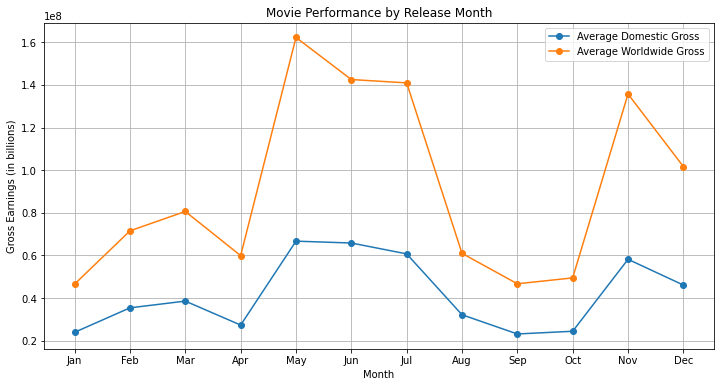

In [120]:
#study the release dates of the movies to see if there is any correlation between the time of release and the movie's performance.

# Group data by 'release_month' and calculate the average domestic and worldwide gross for each month.
month_grouped = budget.groupby('release_month').agg({
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# Create a list of month names for plotting purposes.
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the average domestic and worldwide gross for each month.
plt.figure(figsize=(12, 6))
plt.plot(month_grouped['release_month'], month_grouped['domestic_gross'], marker='o', label='Average Domestic Gross')
plt.plot(month_grouped['release_month'], month_grouped['worldwide_gross'], marker='o', label='Average Worldwide Gross')
plt.xticks(range(1, 13), month_names)
plt.xlabel('Month')
plt.ylabel('Gross Earnings (in billions)')
plt.title('Movie Performance by Release Month')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
average_gross_by_month = budget.groupby('release_month')['worldwide_gross'].mean()

# Find the month with the highest average worldwide gross
best_month_to_release = average_gross_by_month.idxmax()
print("The best month to release movies with high worldwide_gross is:", best_month_to_release)

The best month to release movies with high worldwide_gross is: 5


In [122]:
#lets get the top grossing movie basing on worldwide_gross
# Sort the DataFrame by 'worldwide_gross' in descending order
sorted_df = budget.sort_values(by='worldwide_gross', ascending=False)

# Select the top entries to get the most successful movies by gross revenue
most_successful_movies = sorted_df.head()

# Display the most successful movies
print(most_successful_movies[['movie', 'worldwide_gross']])


                                   movie  worldwide_gross
0                                 Avatar     2.776345e+09
42                               Titanic     2.208208e+09
5   Star Wars Ep. VII: The Force Awakens     2.053311e+09
6                 Avengers: Infinity War     2.048134e+09
33                        Jurassic World     1.648855e+09


In [123]:
# Calculate the profit for each movie
budget['profit'] =  budget['worldwide_gross'] - budget['production_budget']

# Display the movie and its corresponding profite
print(budget[['movie', 'profit']])


                                            movie        profit
0                                          Avatar  2.351345e+09
1     Pirates of the Caribbean: On Stranger Tides  6.350639e+08
2                                    Dark Phoenix -2.002376e+08
3                         Avengers: Age of Ultron  1.072414e+09
4               Star Wars Ep. VIII: The Last Jedi  9.997217e+08
...                                           ...           ...
5777                                       Red 11 -7.000000e+03
5778                                    Following  2.344950e+05
5779                Return to the Land of Wonders -3.662000e+03
5780                         A Plague So Pleasant -1.400000e+03
5781                            My Date With Drew  1.799410e+05

[5782 rows x 2 columns]


In [124]:
# Find the movie with the highest profit
highest_profit_movie = budget.loc[budget['profit'].idxmax()]

# Display the movie with the highest profit
print("Movie with the highest profit:")
print(highest_profit_movie['movie'], " - Profit:", highest_profit_movie['profit'])


Movie with the highest profit:
Avatar  - Profit: 2351345279.0


In [125]:
#find the Average Production Budget for Successful Movies
# Filter successful movies 
successful_movies = budget[budget['profit'] > 0]

# Calculate the average production budget for successful movies
average_production_budget = successful_movies['production_budget'].mean()

# Display the average production budget for successful movies
print("Average Production Budget for Successful Movies:", average_production_budget)


Average Production Budget for Successful Movies: 38447721.78807766


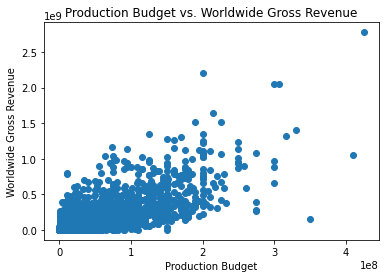

In [126]:
#find relationship of Production Budget  to Box Office Performance
plt.scatter(budget['production_budget'], budget['worldwide_gross'])
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.show()

In [127]:
#Calculate the correlation coefficient
correlation_coefficient = budget['production_budget'].corr(budget['worldwide_gross'])

# Display the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.7483059765694753


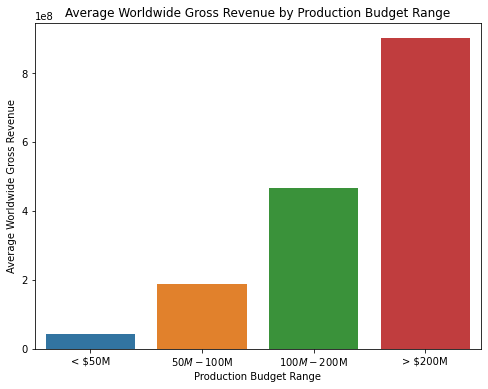

In [128]:
#How Do Different Movie Budgets Correlate with Box Office Success

# Define budget bins 
budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['< $50M', '$50M - $100M', '$100M - $200M', '> $200M']

# Categorize movies into budget bins
budget['budget_category'] = pd.cut(budget['production_budget'], bins=budget_bins, labels=budget_labels)

# Calculate the average worldwide gross revenue for each budget category
average_gross_by_budget = budget.groupby('budget_category')['worldwide_gross'].mean()

# Plot the bar chart to visualize the correlation between budgets and box office success
plt.figure(figsize=(8, 6))
sns.barplot(x=budget_labels, y=average_gross_by_budget)
plt.xlabel('Production Budget Range')
plt.ylabel('Average Worldwide Gross Revenue')
plt.title('Average Worldwide Gross Revenue by Production Budget Range')
plt.show()


Are there any successful movies with relatively low production budgets that could serve as examples for cost-effective productions

In [129]:
# can we get successful movies with relatively low production budgets that could serve as examples for cost-effective productions
# lets calculate the ratio of worldwide gross to production budget
budget['gross_budget_ratio'] = budget['worldwide_gross'] / budget['production_budget']

# Filter movies with a gross_budget_ratio greater than or equal to 5
movie_cost_effective = budget[budget['gross_budget_ratio'] >= 5]

# Sort the movies by gross_budget_ratio in descending order to see the most cost-effective first
movies_cost_effective = movie_cost_effective.sort_values(by='gross_budget_ratio', ascending=False)

print(movies_cost_effective[['movie', 'production_budget', 'worldwide_gross', 'gross_budget_ratio']])


                           movie  production_budget  worldwide_gross  \
5745                 Deep Throat            25000.0       45000000.0   
5613                     Mad Max           200000.0       99750000.0   
5492         Paranormal Activity           450000.0      194183034.0   
5679                 The Gallows           100000.0       41656474.0   
5406     The Blair Witch Project           600000.0      248300000.0   
...                          ...                ...              ...   
4290              Mommie Dearest          5000000.0       25032000.0   
3851             My Name is Khan          8470000.0       42355526.0   
3176  Born on the Fourth of July         14000000.0       70001698.0   
3373                   Spartacus         12000000.0       60000000.0   
4685             Spaced Invaders          3000000.0       15000000.0   

      gross_budget_ratio  
5745         1800.000000  
5613          498.750000  
5492          431.517853  
5679          416.564740  


# RECOMENDATION

we have done our analysis and seen that box office success was majorly factored by the type of movie produced.in this case DRAMA movies and the R rated movies showed potential in leading to box office success .i'd thereby recommend that Microsoft to focus on creatiing films that are drama inclined   and R rated movies.
microsoft new atusio should also consider  releasing a movie that average runtime is 
Action    125.0
Comedy     97.5
Drama     115.0 
coz from box office you could notice that was the average runtime that was used for each genre

timing is equally important when it comes to success of a studio . we can tell  that the best time to yield good movie performance is in May. releasing  movies at that period is great  because worldwide gross will be at top of the roof.and the best time to release our best movie genre,drama is during october. 
we also notice that when there is high budget there is high gross but there instances where low budget can equate to high return of investments (ROI)

i'd also  recommend that microsoft should first release their movies in the USA because it there is emmence reception in that region and also the language English shows so much positive reception

for people Microsoft could outsource the directors who seems to have been directing numerous movie because it seems it has factored to movie success and they can choose from
Top directors with the most movies: ​

Steven Spielberg 10 ​

Clint Eastwood 8​

 Jim Jarmusch 4 ​

curtis Hanson 4 ​
 producing drama movies will be able to earn the an average of $368,000,000 if they follow the movie requrements above.
 